In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # 0 = Malignant, 1 = Benign

In [2]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [3]:
# Check dimensions (Rows, Columns)
print(df.shape)

(569, 31)


In [4]:
# Peek at the first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Check for missing values in every column
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [7]:
# Check data types and general info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# Check the target balance (Malignant vs Benign)
# 0 = Malignant, 1 = Benign
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [9]:
# Statistical summary of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


C:\Users\MY PC\AppData\Local\Temp\ipykernel_12108\2744480216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


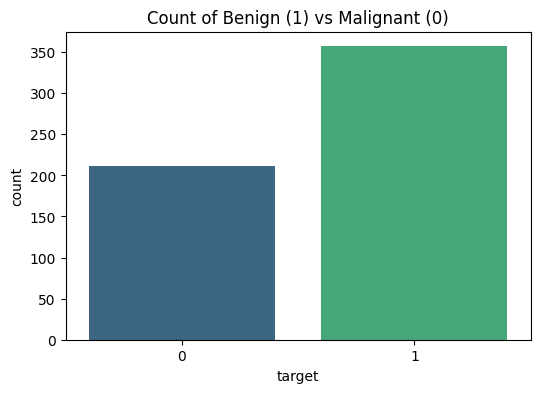

In [10]:

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Count of Benign (1) vs Malignant (0)')
plt.show()

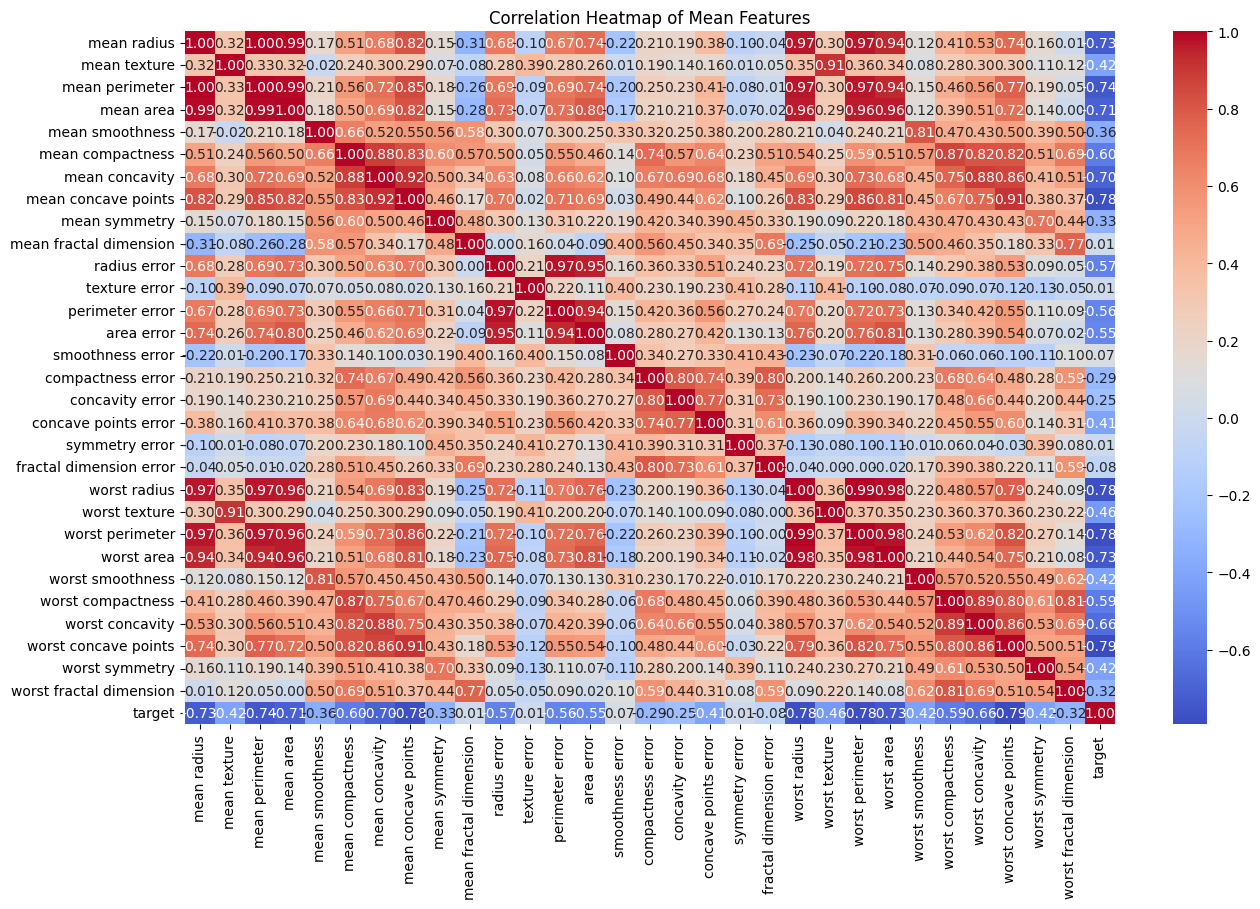

In [19]:
# Correlation Heatmap
plt.figure(figsize=(15, 9))
correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Mean Features')
plt.show()

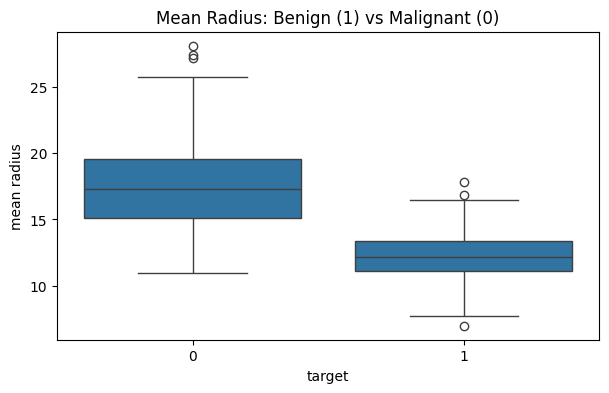

In [15]:
# Comparing 'mean radius' across diagnosis
plt.figure(figsize=(7, 4))
sns.boxplot(x='target', y='mean radius', data=df)
plt.title('Mean Radius: Benign (1) vs Malignant (0)')
plt.show()

In [16]:
# Calculate the correlation matrix
corr_matrix = df.drop('target', axis=1).corr().abs()

# Select the upper triangle of the matrix (to avoid checking the same pair twice)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Features to drop: {to_drop}")

# Drop the redundant features
df_reduced = df.drop(to_drop, axis=1)
print(f"Original shape: {df.shape} | New shape: {df_reduced.shape}")

Features to drop: ['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Original shape: (569, 31) | New shape: (569, 24)


In [20]:
# Check correlation with the target to see which features are most 'predictive'
target_corr = df_reduced.corr()['target'].sort_values(ascending=False)
print("Correlation with Diagnosis:\n", target_corr)

Correlation with Diagnosis:
 target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean radius               -0.730029
mean concave points       -0.776614
worst concave points      -0.793566
Name: target, dtype: float64


In [24]:
# X = Everything except the 'target' column
# y = Only the 'target' column
X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

# test_size=0.2 means 20% of data is saved for the final test
# random_state=42 ensures the 'random' split is the same every time we run it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train created with {X_train.shape[0]} samples.")

X_train created with 455 samples.


In [25]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled to unit variance.")

Data successfully scaled to unit variance.


In [26]:
# Initialize the model
# random_state ensures that results are reproducible every time run the code
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model 
rf_model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


In [27]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Simple accuracy check
from sklearn.metrics import accuracy_score
print(f"Initial Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Initial Accuracy: 94.74%


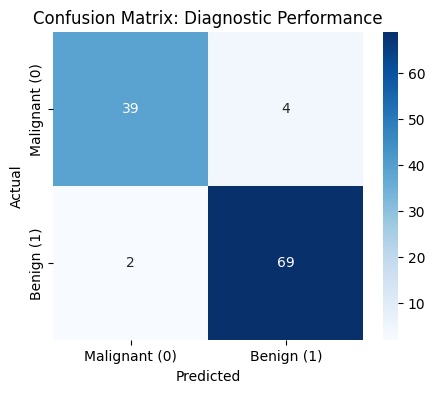

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generate the matrix numbers
cm = confusion_matrix(y_test, y_pred)

# 2. Plotting the Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant (0)', 'Benign (1)'], 
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Diagnostic Performance')
plt.show()

# 3. Print the full report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

C:\Users\MY PC\AppData\Local\Temp\ipykernel_12108\129622955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')


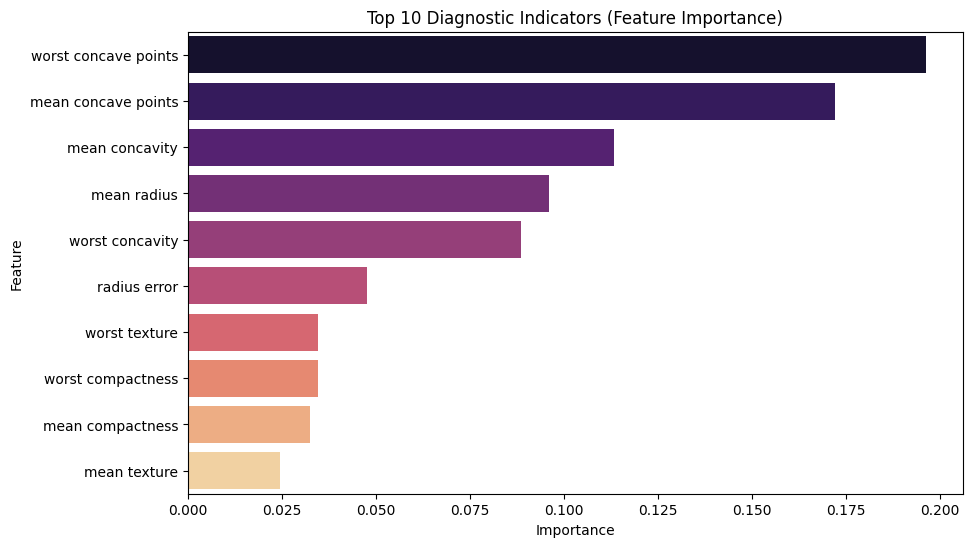

In [30]:
# Extracting feature importance from the Random Forest
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')
plt.title('Top 10 Diagnostic Indicators (Feature Importance)')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

# We use the original scaled features (X_scaled) for the entire dataset
# but for simplicity, we can use X_train_scaled here.
# cv=5 means 5 different 'trials'
scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

print(f"All Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {scores.std():.4f}")

All Cross-Validation Scores: [0.95604396 0.94505495 0.97802198 0.95604396 0.95604396]
Mean Accuracy: 95.82%
Standard Deviation: 0.0108


In [32]:
import joblib # Faster and more efficient than pickle for NumPy arrays

# Save the trained model
joblib.dump(rf_model, 'breast_cancer_model.joblib')

# Save the scaler
joblib.dump(scaler, 'breast_cancer_scaler.joblib')

print("Deployment files (model and scaler) saved successfully!")

Deployment files (model and scaler) saved successfully!
